# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [87]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [89]:
X=torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
Y=torch.tensor([[0,1,2],[3,4,5],[6,6,6],[7,9,8]])

# 행으로 병합 코드
row = torch.concat((X,Y),dim=0)

# 열로 병합 코드
col = torch.concat((X,Y),dim=1)

In [90]:
row

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  6,  6],
        [ 7,  9,  8]])

In [91]:
col

tensor([[ 1,  2,  3,  0,  1,  2],
        [ 4,  5,  6,  3,  4,  5],
        [ 7,  8,  9,  6,  6,  6],
        [10, 11, 12,  7,  9,  8]])

### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [92]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [93]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [94]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [95]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([2.0151, 0.8653]) 
label: tensor([10.2376])


In [97]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기
    for i in range(0,num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [98]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4950,  0.2043],
        [ 1.1174, -0.1901],
        [ 1.7018, -0.9570],
        [ 0.2749, -0.1243],
        [ 0.9874,  0.6286],
        [-0.0534, -0.1289],
        [ 0.6082,  0.7226],
        [-0.3865,  0.5559],
        [-0.4393,  1.1257],
        [ 0.3767,  0.0891],
        [ 0.5736, -0.8996],
        [ 0.7021, -0.0738],
        [-0.3869,  1.1315],
        [ 0.4912, -0.3637],
        [ 0.1799, -0.4314],
        [-1.2293, -1.7366],
        [-2.0031,  1.0966],
        [-0.0534,  1.4170],
        [-0.5956, -1.3185],
        [ 0.5258, -0.2745]]) 
 tensor([[ 6.6817],
        [ 9.1430],
        [12.0595],
        [ 6.5029],
        [ 7.5204],
        [ 5.5395],
        [ 6.2406],
        [ 3.5068],
        [ 2.4989],
        [ 6.5051],
        [ 8.5726],
        [ 7.7175],
        [ 2.6467],
        [ 7.5217],
        [ 6.7050],
        [ 4.4162],
        [-2.1583],
        [ 3.2088],
        [ 5.6991],
        [ 7.4956]])


In [106]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)#원하는 실수를 넣어주세요

In [111]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b ###lr func 코드 완성하기

In [112]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat-y)**2)

In [113]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        if param.grad is not None:
          param -= lr * param.grad / batch_size
          param.grad.zero_()#초기화

In [114]:
lr = 0.01 ###직접 설정
num_epochs = 500 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

#cost graph작성을 위해
wlist = []
losslist = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b],lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

    wlist.append(w.clone().detach().numpy()) # 해당 훈련 시점에서 w를 저장하기 위해서 copy본을 append해줘야함
    losslist.append(torch.mean(train_l))

epoch 1, loss 18.626040
epoch 2, loss 15.379051
epoch 3, loss 12.698328
epoch 4, loss 10.485079
epoch 5, loss 8.657736
epoch 6, loss 7.149014
epoch 7, loss 5.903314
epoch 8, loss 4.874758
epoch 9, loss 4.025485
epoch 10, loss 3.324229
epoch 11, loss 2.745185
epoch 12, loss 2.267042
epoch 13, loss 1.872209
epoch 14, loss 1.546173
epoch 15, loss 1.276936
epoch 16, loss 1.054601
epoch 17, loss 0.870989
epoch 18, loss 0.719363
epoch 19, loss 0.594140
epoch 20, loss 0.490725
epoch 21, loss 0.405318
epoch 22, loss 0.334782
epoch 23, loss 0.276532
epoch 24, loss 0.228422
epoch 25, loss 0.188686
epoch 26, loss 0.155867
epoch 27, loss 0.128761
epoch 28, loss 0.106372
epoch 29, loss 0.087881
epoch 30, loss 0.072608
epoch 31, loss 0.059992
epoch 32, loss 0.049573
epoch 33, loss 0.040967
epoch 34, loss 0.033858
epoch 35, loss 0.027986
epoch 36, loss 0.023135
epoch 37, loss 0.019129
epoch 38, loss 0.015819
epoch 39, loss 0.013085
epoch 40, loss 0.010826
epoch 41, loss 0.008961
epoch 42, loss 0.0074

In [115]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0002, 0.0004], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0001], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

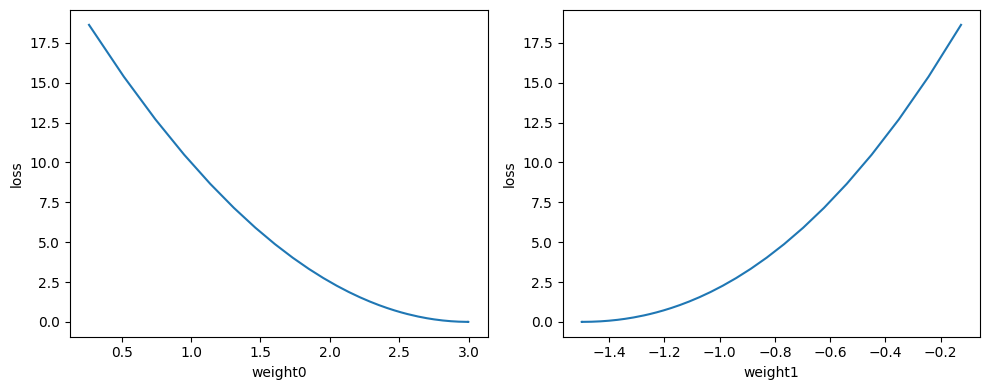

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
val_w0 = [i[0].item() for i in wlist]
plt.plot(val_w0, losslist)
plt.xlabel('weight0')
plt.ylabel('loss')

plt.subplot(1,2,2)
val_w1 = [i[1].item() for i in wlist]
plt.plot(val_w1, losslist)
plt.xlabel("weight1")
plt.ylabel("loss")

plt.tight_layout()

plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [119]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [120]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [121]:
next(iter(data_iter))

[tensor([[ 1.4698,  1.3770],
         [ 0.7563,  1.2379],
         [-0.0116,  0.9804],
         [ 0.9009, -0.1557],
         [-0.8995, -0.6027],
         [-0.8115,  0.8739],
         [-0.5078, -1.1528],
         [ 1.2930,  0.9980],
         [-0.6344, -1.2187],
         [ 0.2327,  0.5889],
         [-0.3886, -0.7806],
         [-0.8000,  0.1328],
         [-0.4291,  1.1520],
         [-0.6353, -0.9217],
         [ 0.2953,  2.6387],
         [ 2.0157, -0.4393],
         [-0.7737, -0.1865],
         [ 0.3044,  0.4368],
         [-0.7147,  0.2399],
         [-2.0801, -0.4621]]),
 tensor([[ 7.8227],
         [ 5.9062],
         [ 4.0199],
         [ 8.4264],
         [ 3.6879],
         [ 1.7558],
         [ 5.7054],
         [ 7.8869],
         [ 5.4110],
         [ 5.3278],
         [ 5.5091],
         [ 2.9012],
         [ 2.4921],
         [ 4.9827],
         [ 2.4208],
         [12.2121],
         [ 3.4510],
         [ 5.7580],
         [ 3.0050],
         [-0.0522]])]

In [124]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))###채워넣기

In [125]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [126]:
loss = nn.MSELoss()###api function으로 직접 설정

In [127]:
trainer = torch.optim.SGD(net.parameters(),lr=0.01)###api function으로 직접 설정 -> optimizer임

In [128]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.733394
epoch 2, loss 0.013120
epoch 3, loss 0.000330


In [130]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0072, -0.0021])
error in estimating b: tensor([0.0134])
